# Implementing CNN using PyTorch

In [ ]:
# Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load Dataset
# Define transformations: Convert images to tensors and normalize them
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to [-1, 1]
])

# Download and load the training dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, transform=transform, download=True
)

# Download and load the test dataset
test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, transform=transform, download=True
)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 439kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.31MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.76MB/s]


In [ ]:
# Create Data Loaders
# Define batch size
batch_size = 64

# Create DataLoaders for training and testing
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


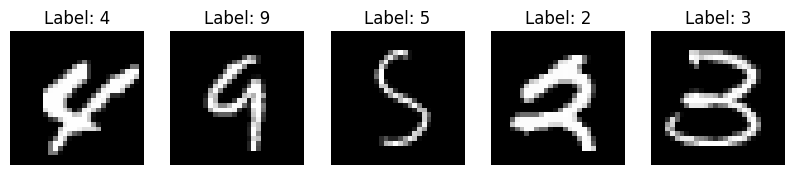

In [ ]:
# Visualize Some Samples

# Function to display images
def show_images(images, labels):
    images = images.numpy()  # Convert tensors to numpy arrays
    fig, axes = plt.subplots(1, len(images), figsize=(10, 2))

    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')  # Remove color channel for grayscale images
        ax.set_title(f'Label: {labels[i].item()}')
        ax.axis('off')

# Get a batch of images from the train_loader
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show first 5 images
show_images(images[:5], labels[:5])
plt.show()

In [ ]:
# Define the Neural Network Model

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Fully connected layers
        self.fc1 = nn.Linear(28*28, 128)  # Input layer → Hidden layer 1
        self.fc2 = nn.Linear(128, 64)     # Hidden layer 1 → Hidden layer 2
        self.fc3 = nn.Linear(64, 10)      # Hidden layer 2 → Output layer

        # Define Leaky ReLU with negative slope (default is 0.01)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image to (batch_size, 784)
        x = self.leaky_relu(self.fc1(x))  # Leaky ReLU for hidden layer 1
        x = self.leaky_relu(self.fc2(x))  # Leaky ReLU for hidden layer 2
        x = self.fc3(x)  # Output logits (no activation, since we use CrossEntropyLoss)
        return x

# Create model instance
model = NeuralNet()
print(model)  # Display model architecture

NeuralNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (leaky_relu): LeakyReLU(negative_slope=0.01)
)


In [ ]:
# Define the loss function (Cross-Entropy for classification tasks)
criterion = nn.CrossEntropyLoss()

# Define the optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print("Loss function and optimizer initialized!")

Loss function and optimizer initialized!


In [ ]:
# Train the Model
num_epochs = 10  # Number of times the model sees the entire dataset

for epoch in range(num_epochs):  # Loop through the dataset multiple times
    running_loss = 0.0  # Track loss per epoch

    for images, labels in train_loader:
        # 1. Zero the gradient buffers
        optimizer.zero_grad()

        # 2. Forward pass
        outputs = model(images)

        # 3. Compute loss
        loss = criterion(outputs, labels)

        # 4. Backward pass (compute gradients)
        loss.backward()

        # 5. Update weights
        optimizer.step()

        # 6. Accumulate loss
        running_loss += loss.item()

    # Print loss after each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training complete!")

Epoch [1/10], Loss: 0.4270
Epoch [2/10], Loss: 0.1794
Epoch [3/10], Loss: 0.1312
Epoch [4/10], Loss: 0.1065
Epoch [5/10], Loss: 0.0887
Epoch [6/10], Loss: 0.0753
Epoch [7/10], Loss: 0.0689
Epoch [8/10], Loss: 0.0590
Epoch [9/10], Loss: 0.0520
Epoch [10/10], Loss: 0.0492
Training complete!


In [ ]:
## Evaluate the Model

correct = 0
total = 0

# Disable gradient computation for evaluation (faster and memory-efficient)
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)  # Total test samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 97.61%


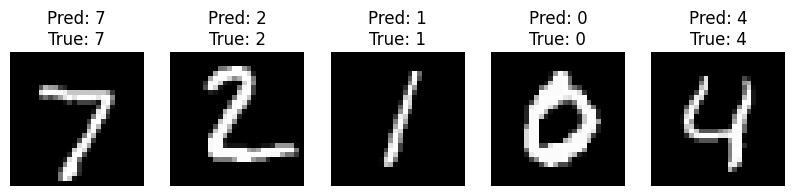

In [ ]:
# Display Predictions on Sample Images
# Get a batch of test images
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Get model predictions
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Function to display images with predicted labels
def show_predictions(images, labels, predicted):
    images = images.numpy()
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))

    for i, ax in enumerate(axes):
        ax.imshow(images[i].squeeze(), cmap='gray')
        ax.set_title(f'Pred: {predicted[i].item()}\nTrue: {labels[i].item()}')
        ax.axis('off')

# Show the first 5 test images with predictions
show_predictions(images[:5], labels[:5], predicted[:5])
plt.show()